<a href="https://colab.research.google.com/github/hyukstory/hyukstory_AI/blob/main/6.%20simpleRNN%2C%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
rnn1 = tf.keras.layers.SimpleRNN(units=1, activation='tanh', return_sequences=True)

In [ ]:
#시퀀스 예측 데이터 생성
X = []
Y = []
for i in range(6):
    # [0,1,2,3], [1,2,3,4] 같은 정수의 시퀀스를 만듭니다.
    lst = list(range(i,i+4))

    # 위에서 구한 시퀀스의 숫자들을 각각 10으로 나눈 다음 저장합니다.
    # SimpleRNN 에 각 타임스텝에 하나씩 숫자가 들어가기 때문에 여기서도 하나씩 분리해서 배열에 저장합니다.
    X.append(list(map(lambda c: [c/10], lst)))

    # 정답에 해당하는 4, 5 등의 정수를 역시 위처럼 10으로 나눠서 저장합니다.
    Y.append((i+4)/10)
    
X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [ ]:
#시퀀스 예측 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, Y, epochs=100, verbose=0)
print(model.predict(X))

[[0.38479674]
 [0.500463  ]
 [0.609256  ]
 [0.71003497]
 [0.80238295]
 [0.8864037 ]]


In [ ]:
#학습되지 않은 시퀀스에 대한 예측 결과
print(model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]])))
print(model.predict(np.array([[[-0.1],[0.0],[0.1],[0.2]]])))

[[0.96250856]]
[[0.2641778]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, SimpleRNN

# time step만큼 시퀀스 데이터 분리
def split_sequence(sequence, step):
    x, y = list(), list()

    for i in range(len(sequence)):
        end_idx = i + step
        if end_idx > len(sequence) - 1:
            break

        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        x.append(seq_x)
        y.append(seq_y)

    return np.array(x), np.array(y)


# sin 함수 학습 데이터
x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
train_y = [np.sin(i) for i in x]

# 하이퍼파라미터
n_timesteps = 15
n_features = 1

# 시퀀스 나누기
# train_x.shape => (samples, timesteps)
# train_y.shape => (samples)
train_x, train_y = split_sequence(train_y, step=n_timesteps)
print("shape x:{} / y:{}".format(train_x.shape, train_y.shape))

# RNN 입력 벡터 크기를 맞추기 위해 벡터 차원 크기 변경
# reshape from [samples, timesteps] into [samples, timesteps, features]
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print("train_x.shape = {}".format(train_x.shape))
print("train_y.shape = {}".format(train_y.shape))

# RNN 모델 정의
model = Sequential()
model.add(SimpleRNN(units=10, return_sequences=False, input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 모델 학습
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=5, mode='auto')
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

# loss 그래프 생성
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

# 테스트 데이터셋 생성
test_x = np.arange(10, 20, 0.1)
calc_y = np.cos(test_x) # 테스트 정답 데이터

# RNN 모델 예측 및 로그 저장
test_y = calc_y[:n_timesteps]
for i in range(len(test_x) - n_timesteps):
    net_input = test_y[i : i + n_timesteps]
    net_input = net_input.reshape((1, n_timesteps, n_features))
    train_y = model.predict(net_input, verbose=0)
    print(test_y.shape, train_y.shape, i, i + n_timesteps)
    test_y = np.append(test_y, train_y)

# 예측 결과 그래프 그리기
plt.plot(test_x, calc_y, label="ground truth", color="orange")
plt.plot(test_x, test_y, label="predicitons", color="blue")
plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()

# simple RNN 과적합 확인

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
# 곱셉 문제 데이터 생성
X = []
Y = []
for i in range(3000) :
  # 0 ~ 1 사이의 랜덤한 숫자 100개를 만듭니다
  lst = np.random.rand(100)
  # 마킹할 숫자 2개의인덱스를 뽑습니다.
  idx = np.random.choice(100,2,replace = False) 
  # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다
  zeros = np.zeros(100)
  zeros[idx] = 1
  # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X에 저장합니다.
  X.append(np.array(list(zip(zeros, lst))))
  # 마킹 인덱스가 1인 값들만 서로 곱해서 Y에 저장합니다
  Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

In [ ]:
# simpleRNN 레이어를 사용한 곱셈 문제 모델 정의

model = tf.keras.Sequential([tf.keras.layers.SimpleRNN(units = 30, return_sequences = True, input_shape = [100,2]),
                             tf.keras.layers.SimpleRNN(units = 30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# SimpleRNN 네트워크 학습
X = np.array(X)
Y = np.array(Y)

# 2560개의 데이터만 학습시킵니다. validation 데이터는 20% 로 지정합니다.
history = model.fit(X[:2560], Y[:2560], epochs = 100, validation_split = 0.2)

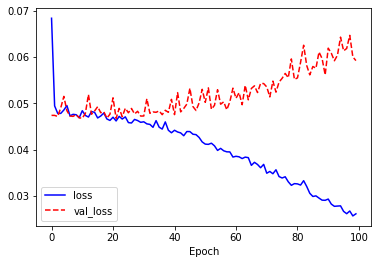

In [ ]:
#SimpleRNN 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])

# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5) :
  print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560 + i]))

prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)) :
  # 오차가 0.04 이상이면 오답입니다.
  if abs(prediction[i][0] - Y[2560 + i]) > 0.04 :
    fail += 1

print('correctness :', (440 - fail) / 440 * 100, '%')

14/14 [==============================] - 0s 14ms/step - loss: 0.0619
0.005193700163536657 	 0.22309142 	diff: 0.21789772334796847
0.3893051113781547 	 0.48328 	diff: 0.09397489169267659
0.26236588274342565 	 0.17115045 	diff: 0.0912154368053153
0.44233249558256743 	 0.19483061 	diff: 0.24750188423441527
0.02590214352724012 	 0.25726438 	diff: 0.23136223215940538
correctness : 12.727272727272727 %


# LSTM 

In [ ]:
# LSTM 레이어를 사용한 곱셈 문제 모델 정의

model = tf.keras.Sequential([tf.keras.layers.LSTM(units = 30, return_sequences = True, input_shape = [100,2]),
                             tf.keras.layers.LSTM(units = 30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# LSTM 네트워크 학습
X = np.array(X)
Y = np.array(Y)

# 2560개의 데이터만 학습시킵니다. validation 데이터는 20% 로 지정합니다.
history = model.fit(X[:2560], Y[:2560], epochs = 100, validation_split = 0.2)

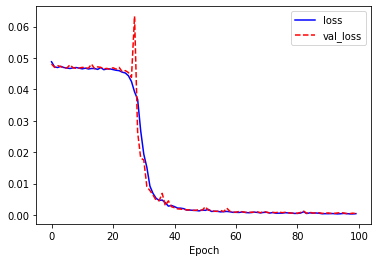

In [ ]:
#LSTM 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])

# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5) :
  print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560 + i]))

prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)) :
  # 오차가 0.04 이상이면 오답입니다.
  if abs(prediction[i][0] - Y[2560 + i]) > 0.04 :
    fail += 1

print('correctness :', (440 - fail) / 440 * 100, '%')

14/14 [==============================] - 1s 6ms/step - loss: 4.2263e-04
0.005193700163536657 	 0.014260411 	diff: 0.00906671109897555
0.3893051113781547 	 0.40737194 	diff: 0.018066826850452467
0.26236588274342565 	 0.2692334 	diff: 0.006867522846631724
0.44233249558256743 	 0.43113726 	diff: 0.011195231807695605
0.02590214352724012 	 0.0805248 	diff: 0.05462265868070666
correctness : 94.54545454545455 %


 # E.O.D